Projet

L’objectif principal de ce projet consiste, dans un premier temps, à analyser les données de
ventes mensuelles d’une entreprise. Ensuite, entreprendre la segmentation des clients, et enfin,
nous développer un modèle de machine learning afin de prédire la valeur à vie de chaque client..
Partie A :
La direction marketing vous soumet un dossier nommé données_ventes qui contient
plusieurs fichiers.Leur souhait est d’avoir des informations pertinentes de leur activités basées
sur les données.
1. Avec un script python, récupérer touts les fichiers qui sont dans le dossier et stocker
les dans un fichier csv que vous nommez data .
2. Charger le fichier csv enregistré et essayer de répondre aux questions suivantes en
faisant les transformations nécessaires. Pour des raisons d’analyse, vous pouvez sup-
primer toutes les valeurs manquantes. Choisissez un type de graphe pour visualiser
chaque résultat.
3. Quel est le mois durant le quel l’entreprise a realisé le meilleur chiffre d’affaire ?
4. Dans quelle ville, l’entreprise a enregistré le maximum de commandes ?
5. En quel moment doit on faire une campagne de publicité pour avoir plus de ventes ?
6. Quel est le produit qui est plus vendu ? Essayer d’expliquer pourquoi il est plus vendu ?
7. Quelles sont les combinaisons de produits qui se vendent le plus ?
8. Vous pourriez répondre à d’autres questions si nécessaires.

Avec un script python, nous allons récupérer tous les fichiers qui sont dans le dossier et les stocker dans un fichier csv qu'on va nommer data

In [18]:
import os
import pandas as pd

# Dossier contenant les fichiers CSV qu'on souhaite fusionner
dossier_source = "données_ventes"
# Chemin du fichier CSV de sortie
fichier_sortie = "data.csv"

# Liste pour stocker les dataframes des fichiers CSV
dataframes = []

# Parcourir tous les fichiers dans le dossier source
for fichier in os.listdir(dossier_source):
    if fichier.endswith(".csv"):
        chemin_fichier = os.path.join(dossier_source, fichier)
        # Lire chaque fichier CSV et le stocker dans la liste des dataframes
        df = pd.read_csv(chemin_fichier)
        dataframes.append(df)

# Fusionner les dataframes en un seul dataframe
df_fusion = pd.concat(dataframes, ignore_index=True)

# Écrire le dataframe fusionné dans un fichier CSV de sortie
df_fusion.to_csv(fichier_sortie, index=False)

Nous allons maintenant charger notre fichier data.csv et nettoyer les données manquantes

In [45]:
import pandas as pd

# Chargement du fichier CSV
fichier_entree = "data.csv"
fichier_sortie = "data_vente.csv"

# Charger le fichier CSV en utilisant la première ligne comme entêtes
df = pd.read_csv(fichier_entree, header=0)

# Supprimer les lignes qui correspondent exactement aux entêtes
entetes = ["Order ID", "Product", "Quantity Ordered", "Price Each", "Order Date", "Purchase Address"]
df = df[~df.apply(lambda row: all(row == entetes), axis=1)]

# Supprimer les lignes avec des valeurs manquantes, à l'exception de la première ligne
df = df.dropna(subset=df.columns[1:], how="all")

# Transformer les colonnes "Quantity Ordered" et "Price Each" en données de type float
df["Quantity Ordered"] = df["Quantity Ordered"].astype(float)
df["Price Each"] = df["Price Each"].astype(float)

# Transformer la colonne "Order Date" en données de type date avec des barres obliques comme séparateurs
df["Order Date"] = pd.to_datetime(df["Order Date"], format='%m/%d/%y %H:%M')

# Formater les dates avec des tirets comme séparateurs pour le fichier de sortie
# df["Order Date"] = df["Order Date"].dt.strftime('%Y/%m/%d %H:%M')

# Réindexer le dataframe
df.reset_index(drop=True, inplace=True)

# Enregistrer le dataframe résultant dans un nouveau fichier CSV
# df.to_csv(fichier_sortie, index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 8.5+ MB


3. Quel est le mois durant le quel l’entreprise a realisé le meilleur chiffre d’affaire ?

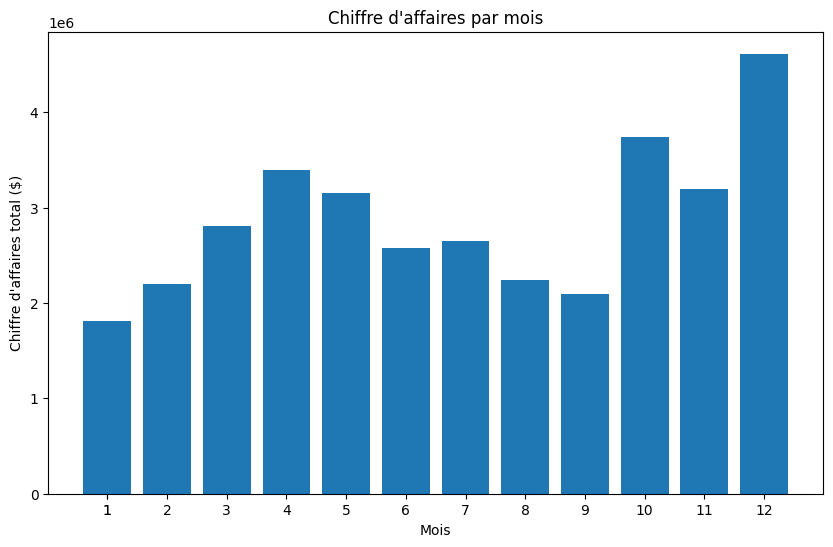

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
fichier_entree = "data_vente.csv"
df = pd.read_csv(fichier_entree)

# Assurer que la colonne "Order Date" est de type datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Extraire le mois et l'année à partir de la colonne "Order Date"
df["Month"] = df["Order Date"].dt.month
df["Year"] = df["Order Date"].dt.year

# Créer une nouvelle colonne "Total Sales" (Chiffre d'affaires total) en multipliant la "Quantity Ordered" par le "Price Each"
df["Total Sales"] = df["Quantity Ordered"] * df["Price Each"]

# Regrouper les données par mois et année, puis calculer le chiffre d'affaires total pour chaque mois
ventes_par_mois = df.groupby(["Month", "Year"])["Total Sales"].sum().reset_index()

# Créer un graphique en barres pour visualiser les ventes par mois
plt.figure(figsize=(10, 6))
plt.bar(ventes_par_mois["Month"], ventes_par_mois["Total Sales"])
plt.xlabel("Mois")
plt.ylabel("Chiffre d'affaires total ($)")
plt.title("Chiffre d'affaires par mois")
plt.xticks(ventes_par_mois["Month"])
plt.show()


4. Dans quelle ville, l’entreprise a enregistré le maximum de commandes ?

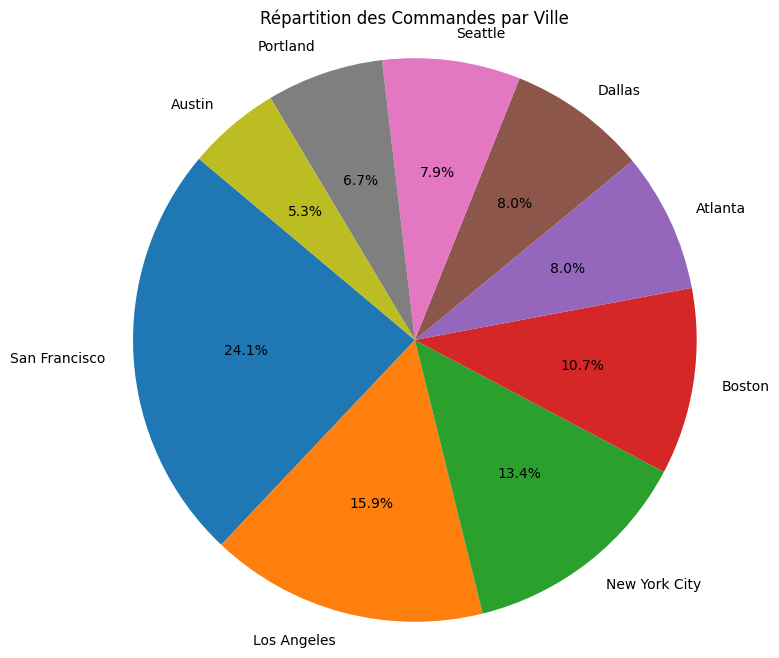

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
fichier_entree = "data_vente.csv"
df = pd.read_csv(fichier_entree)

# Extraire la ville à partir de la colonne "Purchase Address"
df["City"] = df["Purchase Address"].apply(lambda x: x.split(",")[1].strip())

# Compter le nombre de commandes par ville
commandes_par_ville = df["City"].value_counts()

# Créer un diagramme à secteurs pour visualiser les commandes par ville
plt.figure(figsize=(8, 8))
plt.pie(commandes_par_ville, labels=commandes_par_ville.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Pour s'assurer que le diagramme est un cercle
plt.title("Répartition des Commandes par Ville")
plt.show()


5. Si on se base sur le nombre de chiffres d'affaires, nous pouvons dire que le moment où on doit faire le plus de vente est le mois de d'Avril, Octobre et Décembre. Si on fait une campagne de publicité au cours de ces mois, la probabilité d'avoir plus de vente est plus élevée.

Quel est le produit qui est plus vendu ? Essayer d’expliquer pourquoi il est plus vendu ?

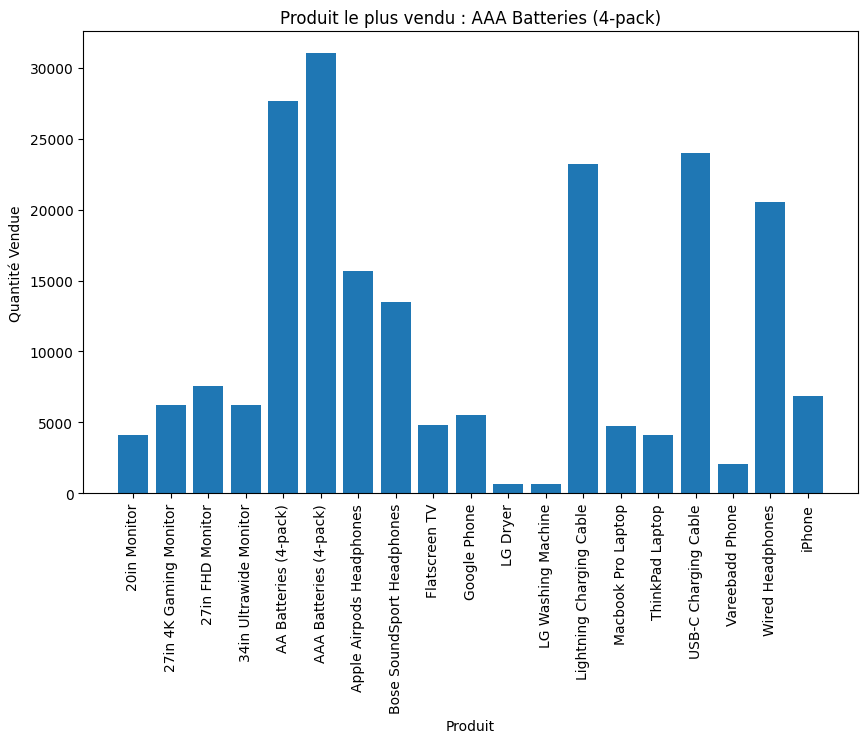

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger le fichier CSV
fichier_entree = "data_vente.csv"
df = pd.read_csv(fichier_entree)

# Regrouper les données par produit et calculer la quantité totale vendue de chaque produit
produits_vendus = df.groupby("Product")["Quantity Ordered"].sum().reset_index()

# Trouver le produit le plus vendu
produit_plus_vendu = produits_vendus.loc[produits_vendus["Quantity Ordered"].idxmax()]

# Créer un graphique en barres pour visualiser les quantités vendues par produit
plt.figure(figsize=(10, 6))
plt.bar(produits_vendus["Product"], produits_vendus["Quantity Ordered"])
plt.xlabel("Produit")
plt.ylabel("Quantité Vendue")
plt.title("Produit le plus vendu : {}".format(produit_plus_vendu["Product"]))
plt.xticks(rotation=90)
plt.show()


Ici, nous voyons que le produit le plus vendu est : AAA Batteries (4-Pack). Cela peut se justifier par son bas prix.

Quelles sont les combinaisons de produits qui se vendent le plus ?

In [ ]:
import pandas as pd
from collections import Counter

# Charger le fichier CSV
fichier_entree = "data_vente.csv"
df = pd.read_csv(fichier_entree)

# Combiner les produits dans chaque commande
df["Product Group"] = df.groupby("Order ID")["Product"].transform(lambda x: ', '.join(x))

# Compter les combinaisons de produits les plus vendues
combinations_count = Counter()

for group in df["Product Group"]:
    products = group.split(", ")
    combinations = list(combinations(products, 2))
    for combination in combinations:
        combination = ', '.join(sorted(combination))
        combinations_count[combination] += 1

# Trouver les 10 combinaisons de produits les plus vendues
top_combinations = combinations_count.most_common(10)

# Afficher les 10 combinaisons de produits les plus vendues
for combination, count in top_combinations:
    print(f"Combinaison : {combination} - Quantité vendue : {count}")


Partie B :
Le département marketing souhaite lancer une campagne de marketing. Ils souhaitent
identifier les segments de clientèle les plus rentables pour cibler les efforts marketing et publi-
citaires de manière plus précise. Votre rôle consiste à diviser les clients de la société en groupes
distincts en fonction de certaines caractéristiques, telles que les préférences, les comportements
d’achat, ...
1. Charger à nouveau le fichier data.
2. Faites le nettoyage et les transformations nécessaires pour faire une segmentation.
3. En utilisant un algorithme de machine learning, faire une segmentation des clients et
justifier le nombres de classes obtenues.
4. Décriver pour chaque classe en precisant sa proportion sur le chiffre d’affaires de la
societé et les produits plus achetés par les clients de chaque classe.

Chargeons et nettoyons les données

In [1]:
import pandas as pd

# Charger le fichier CSV
fichier_entree = "data_vente.csv"
df = pd.read_csv(fichier_entree)

# Supprimer les lignes avec des valeurs manquantes
df.dropna(inplace=True)

# Supprimer les doublons si nécessaire
df.drop_duplicates(inplace=True)

# Convertir les colonnes pertinentes en types de données appropriés (par exemple, quantité en entier, prix en float, date en datetime, etc.)
df["Quantity Ordered"] = df["Quantity Ordered"].astype(int)
df["Price Each"] = df["Price Each"].astype(float)
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Ajouter des colonnes supplémentaires si nécessaire pour les analyses ultérieures
df["Total Sales"] = df["Quantity Ordered"] * df["Price Each"]
df_encoded = pd.get_dummies(df, columns=df.select_dtypes(exclude=['int', 'float']).columns)
df

MemoryError: Unable to allocate 18.9 GiB for an array with shape (142395, 142395) and data type bool

3. En utilisant un algorithme de machine learning, faire une segmentation des clients et
justifier le nombres de classes obtenues. Faisons l'encodage des données.